First 5 rows of the dataset:
                    name  release_date  price  \
0       Galactic Bowling  Oct 21, 2008  19.99   
1           Train Bandit  Oct 12, 2017   0.99   
2               Henosis™  Jul 23, 2020   5.99   
3  Two Weeks in Painland   Feb 3, 2020   0.00   
4         Wartune Reborn  Feb 26, 2021   0.00   

                                   short_description  recommendations  \
0  Galactic Bowling is an exaggerated and stylize...                0   
1  THE LAW!! Looks to be a showdown atop a train....                0   
2  HENOSIS™ is a mysterious 2D Platform Puzzler w...                0   
3  Two Weeks in Painland is a story-driven game a...                0   
4  'Wartune Reborn' epic magic TBS game was devel...                0   

                                          categories  \
0  ['Single-player', 'Multi-player', 'Steam Achie...   
1  ['Single-player', 'Steam Achievements', 'Full ...   
2       ['Single-player', 'Full controller support']   
3            

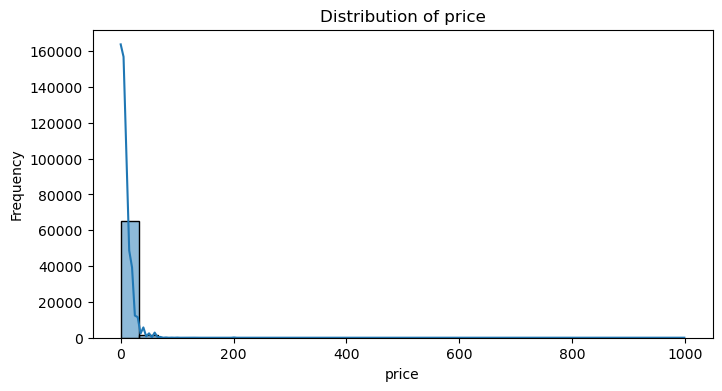

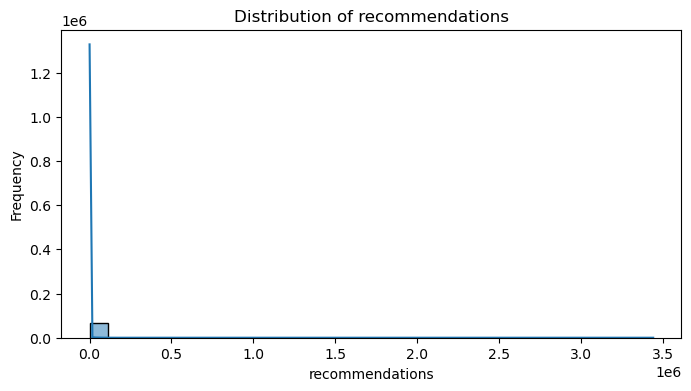

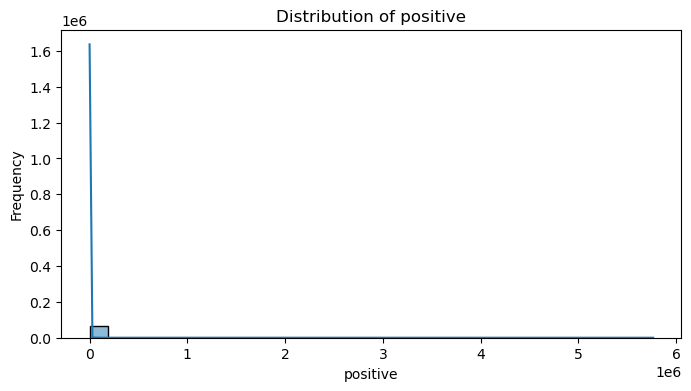

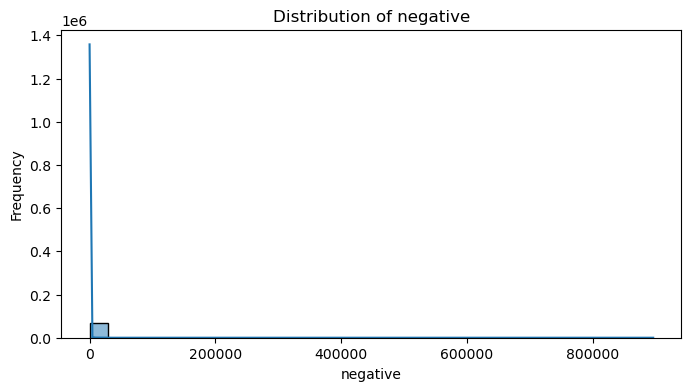

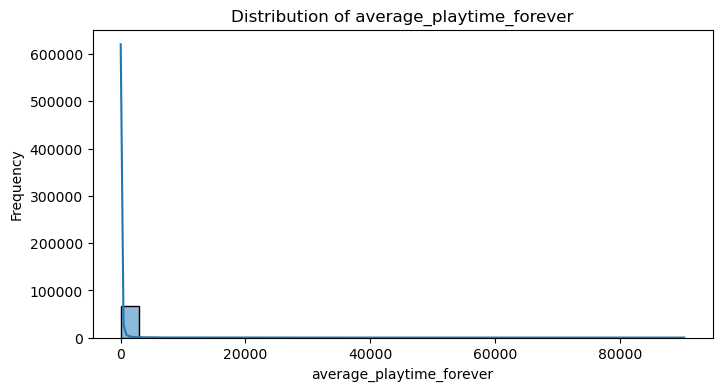

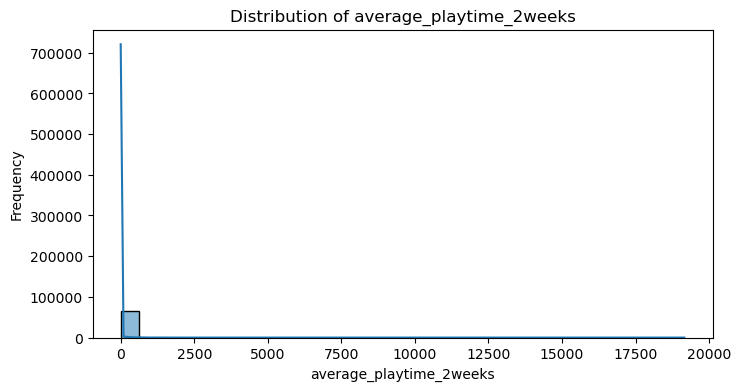

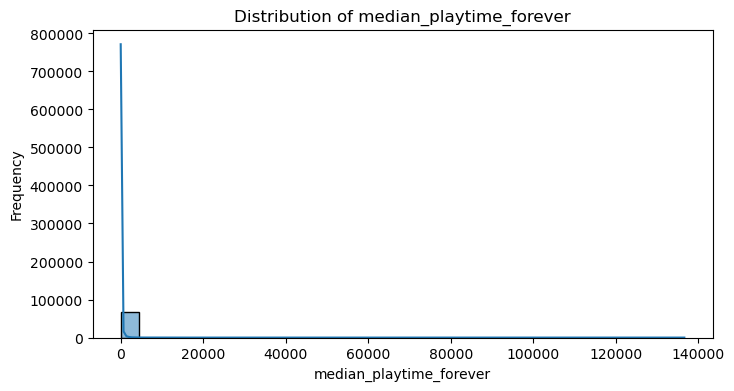

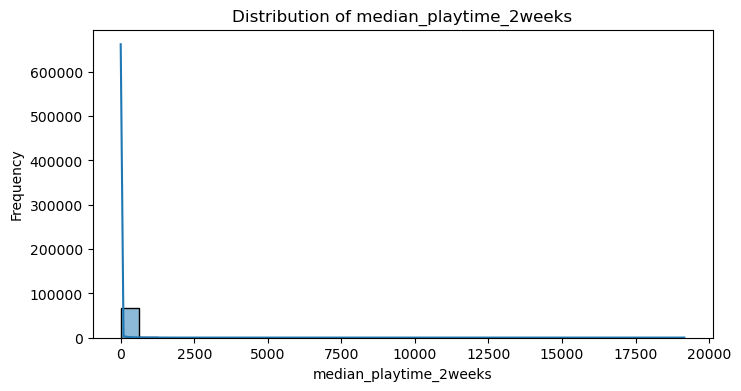

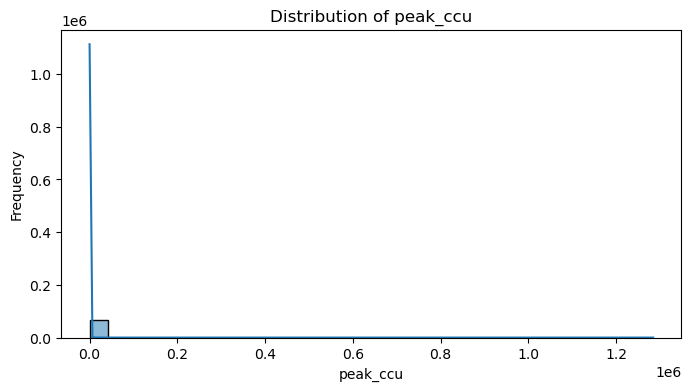

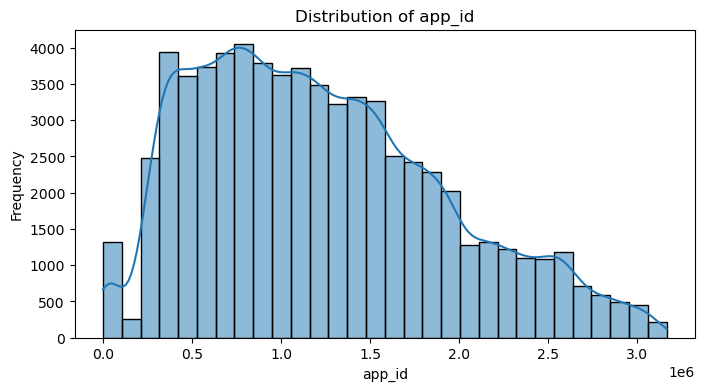

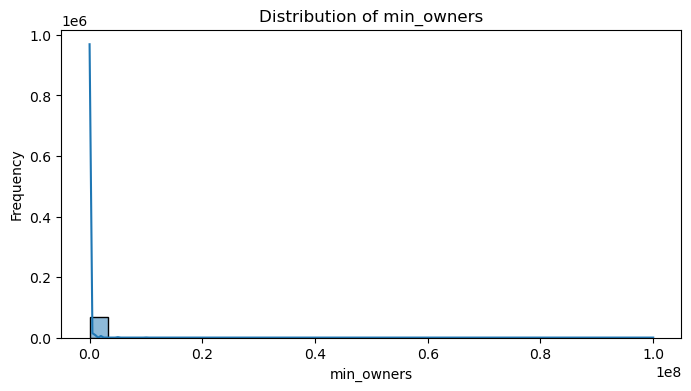

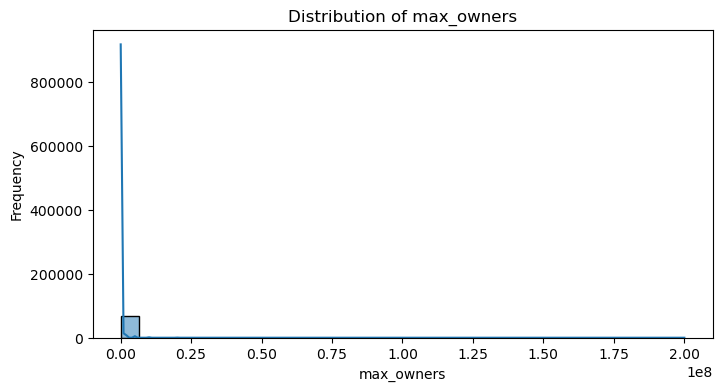

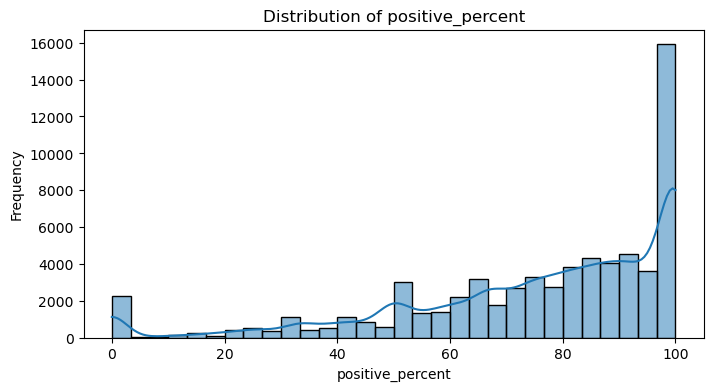

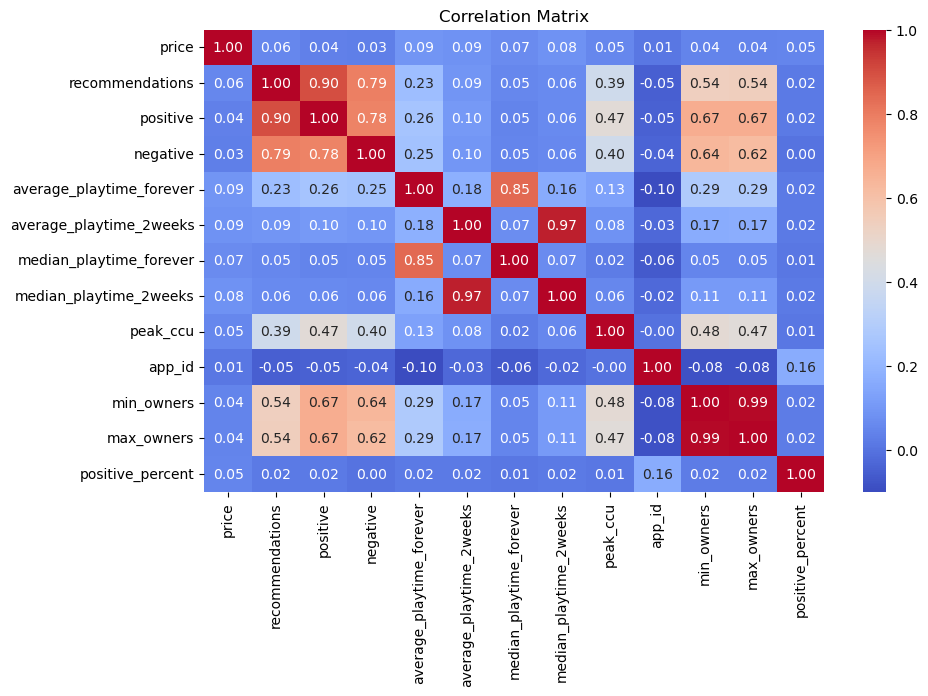

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('games.csv')

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# Display basic information about the dataset
print("\nDataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Display basic statistics
print("\nBasic Statistics:")
print(df.describe())

# Visualize the distribution of numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Visualize correlations between numerical columns
plt.figure(figsize=(10, 6))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [4]:
print(df['tags'].head())
print(df['categories'].head())

# Check the data type
print(df['tags'].apply(type).unique())
print(df['categories'].apply(type).unique())

0             ['Indie', 'Casual', 'Sports', 'Bowling']
1    ['Indie', 'Action', 'Pixel Graphics', '2D', 'R...
2    ['2D Platformer', 'Atmospheric', 'Surreal', 'M...
3    ['Indie', 'Adventure', 'Nudity', 'Violent', 'S...
4    ['Turn-Based Combat', 'Massively Multiplayer',...
Name: tags, dtype: object
0    ['Single-player', 'Multi-player', 'Steam Achie...
1    ['Single-player', 'Steam Achievements', 'Full ...
2         ['Single-player', 'Full controller support']
3              ['Single-player', 'Steam Achievements']
4    ['Single-player', 'Multi-player', 'MMO', 'PvP'...
Name: categories, dtype: object
[<class 'str'>]
[<class 'str'>]


In [8]:
import ast

# Convert 'tags' column to proper lists
df['tags'] = df['tags'].apply(ast.literal_eval)

# Convert 'categories' column to proper lists (if needed)
df['categories'] = df['categories'].apply(ast.literal_eval)

In [6]:
print(df['tags'].head())
print(df['tags'].apply(type).unique())  # Should show <class 'list'>

0                     [Indie, Casual, Sports, Bowling]
1    [Indie, Action, Pixel Graphics, 2D, Retro, Arc...
2    [2D Platformer, Atmospheric, Surreal, Mystery,...
3    [Indie, Adventure, Nudity, Violent, Sexual Con...
4    [Turn-Based Combat, Massively Multiplayer, Mul...
Name: tags, dtype: object
[<class 'list'>]


In [7]:
from collections import Counter

# Flatten the 'tags' column
all_tags = [tag for tags_list in df['tags'] for tag in tags_list]
tag_counts = Counter(all_tags)

# Convert to DataFrame for better visualization
tags_df = pd.DataFrame(tag_counts.items(), columns=[
                       'Tag', 'Count']).sort_values(by='Count', ascending=False)

print(tags_df.head())

# Flatten the 'categories' column
all_categories = [category for categories_list in df['categories']
                  for category in categories_list]
category_counts = Counter(all_categories)

# Convert to DataFrame for better visualization
categories_df = pd.DataFrame(category_counts.items(), columns=[
                             'Category', 'Count']).sort_values(by='Count', ascending=False)

print(categories_df.head())

             Tag  Count
0          Indie  41776
12  Singleplayer  35787
4         Action  30218
1         Casual  28858
28     Adventure  28345
                   Category  Count
0             Single-player  63576
2        Steam Achievements  33134
15              Steam Cloud  17699
4   Full controller support  14882
1              Multi-player  13367


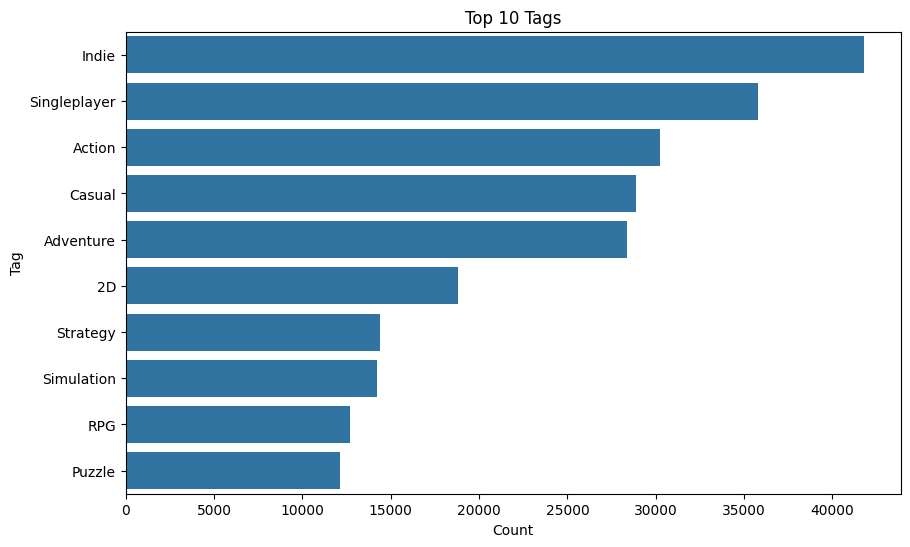

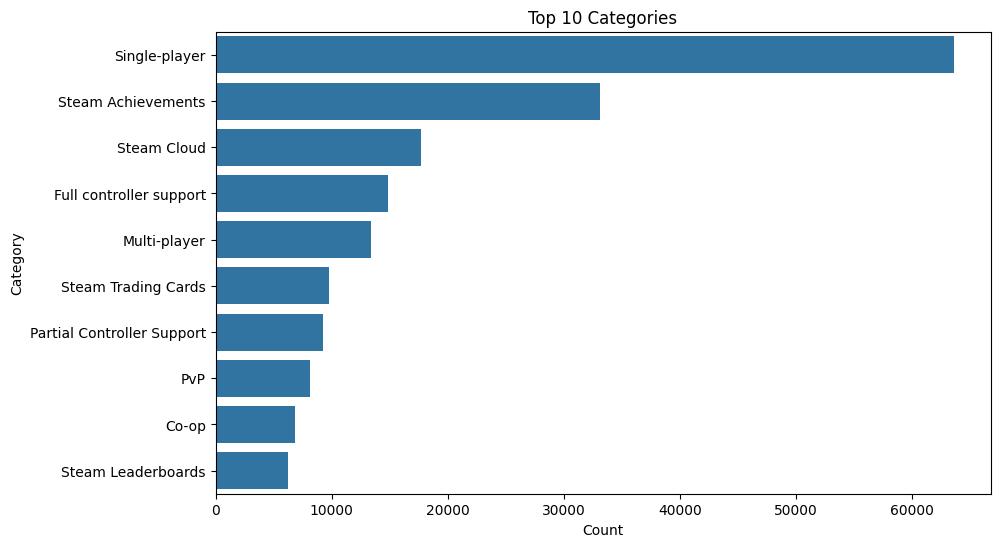

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot top 10 tags
plt.figure(figsize=(10, 6))
sns.barplot(data=tags_df.head(10), x='Count', y='Tag')
plt.title('Top 10 Tags')
plt.show()
# Plot top 10 categories
plt.figure(figsize=(10, 6))
sns.barplot(data=categories_df.head(10), x='Count', y='Category')
plt.title('Top 10 Categories')
plt.show()

In [9]:
# Count the number of tags per row
df['num_tags'] = df['tags'].apply(len)

# Summary statistics
print(df['num_tags'].describe())

# Correlation with another column (e.g., 'rating')
print(df[['num_tags', 'peak_ccu']].corr())

count    66603.000000
mean        13.007822
std          6.587152
min          0.000000
25%          6.000000
50%         14.000000
75%         20.000000
max         21.000000
Name: num_tags, dtype: float64
          num_tags  peak_ccu
num_tags  1.000000  0.025393
peak_ccu  0.025393  1.000000


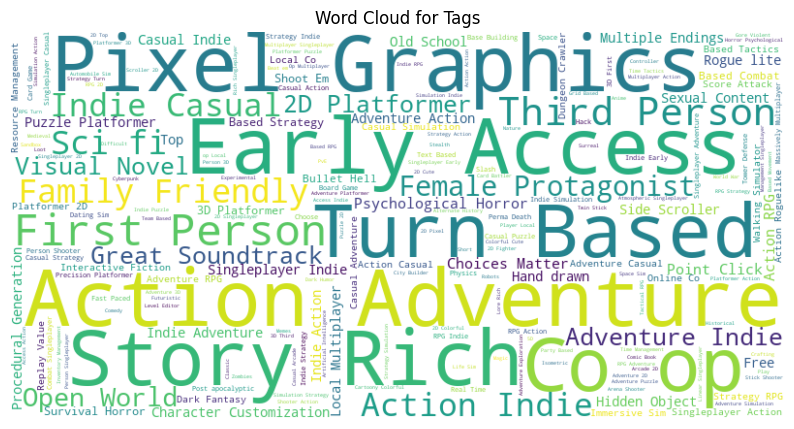

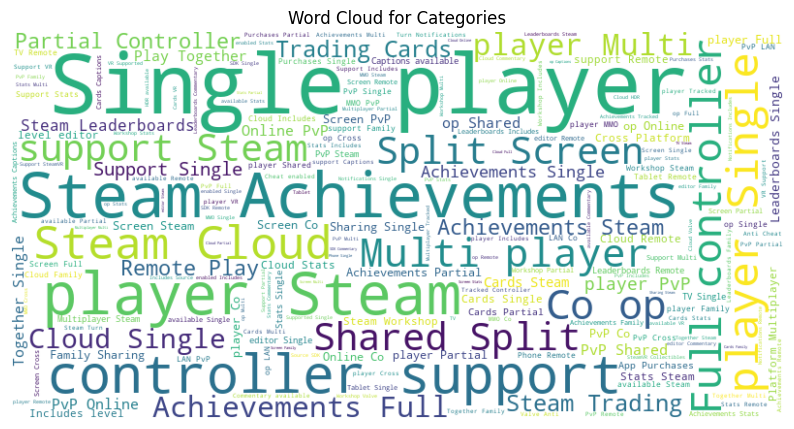

In [10]:
from wordcloud import WordCloud

# Word cloud for tags
tag_wordcloud = WordCloud(
    width=800, height=400, background_color='white').generate(' '.join(all_tags))
plt.figure(figsize=(10, 6))
plt.imshow(tag_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Tags')
plt.show()

# Word cloud for categories
category_wordcloud = WordCloud(
    width=800, height=400, background_color='white').generate(' '.join(all_categories))
plt.figure(figsize=(10, 6))
plt.imshow(category_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Categories')
plt.show()

C:\Users\Sergey\AppData\Local\Temp\ipykernel_2280\771207078.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tag_peak_ccu.head(10), x='metacritic_score',


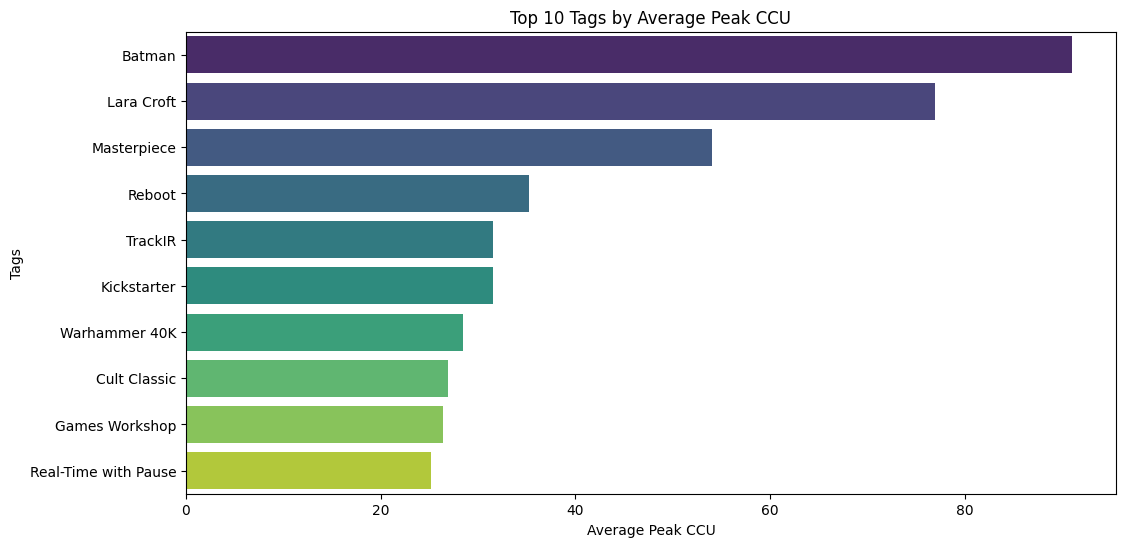

In [11]:
# Explode the 'tags' column to create one row per tag
tags_exploded = df.explode('tags')

# Group by 'tags' and calculate the average peak_ccu for each tag
tag_peak_ccu = tags_exploded.groupby(
    'tags')['metacritic_score'].mean().reset_index()

# Sort by peak_ccu in descending order
tag_peak_ccu = tag_peak_ccu.sort_values(by='metacritic_score', ascending=False)

# Plot the top 10 tags by average peak_ccu
plt.figure(figsize=(12, 6))
sns.barplot(data=tag_peak_ccu.head(10), x='metacritic_score',
            y='tags', palette='viridis')
plt.title('Top 10 Tags by Average Peak CCU')
plt.xlabel('Average Peak CCU')
plt.ylabel('Tags')
plt.show()

In [ ]:
df.columns

Index(['name', 'release_date', 'required_age', 'price', 'dlc_count',
       'detailed_description', 'about_the_game', 'short_description',
       'reviews', 'header_image', 'website', 'support_url', 'support_email',
       'windows', 'mac', 'linux', 'metacritic_score', 'metacritic_url',
       'achievements', 'recommendations', 'notes', 'supported_languages',
       'full_audio_languages', 'packages', 'developers', 'publishers',
       'categories', 'genres', 'screenshots', 'movies', 'user_score',
       'score_rank', 'positive', 'negative', 'average_playtime_forever',
       'average_playtime_2weeks', 'median_playtime_forever',
       'median_playtime_2weeks', 'peak_ccu', 'tags', 'tag_frequencies',
       'app_id', 'min_owners', 'max_owners', 'num_tags'],
      dtype='object')

: 

In [7]:
import pandas as pd
from ydata_profiling import ProfileReport

report = ProfileReport(df, title='My Data')
report.to_file("my_report.html")

ImportError: cannot import name 'ProfileReport' from 'ydata_profiling' (unknown location)

In [6]:
df['release_date']  = pd.to_datetime(df['release_date'], errors='coerce')

In [7]:
df['release_date']

0       2008-10-21
1       2017-10-12
2       2020-07-23
3       2020-02-03
4       2021-02-26
           ...    
66598   2024-07-30
66599   2024-08-23
66600   2024-08-09
66601   2024-08-19
66602   2024-08-28
Name: release_date, Length: 66603, dtype: datetime64[ns]